# Quantum computing basics

In this tutorial we will go through the basics of quantum computing: qubit definition, basic gates, measurments and circuit structures. We will use Qiskit quantum computing SDK (https://qiskit.org/). The notebook assumes you have qiskit libraries and well as matplotlib installed. 


## Contents 

1. [Basics on Quantum Information](#basics)

    1.1. [Qubits and their representation](#qubits)
    
    1.2. [Multiple qubits](#multiplequbits)
    
    1.3  [Modifying a state](#modifyingastate)
    
    1.4  [Quantum circuits](#quantumcircuits)
    
2. [Implementation fo a quantum circuit](#basiccircuits)

    2.1. [Hadamards](#hadamards)
    
    2.2. [Measurments](#measurements)
    
    2.3. [Multiplequbit gates](#multiplequbits)    
    
      2.3.1 [CNOT](#cnot)       
    
      2.3.2 [SWAP](#swap)
    
      2.3.3 [Toffoli](#toffoli)
          
3. [Circuits](#circuits)

4. [Benchmarking gates: Hadamard,CNOT,T-gate](#timing)
   

5. [Random circuits](#RC)
        
    3.1. [Implementation 1](#RC1)
    
    3.2. [Implmentation 2](#RC2)
    
    3.3. [Implmentation 3](#RC3)
    
6. [Conclusion](#conclusion)

# Basics on Quantum information <a id ='basics'></a>

## 1.1 Qubits and their representation <a id ='qubits'></a>

Information in a quantum computer is stored in qubits.
A qubit is a two state system with quantum properties. As opposed to a bit that can only be in state 0 or 1 (on or off), a qubit can have any value in between (like a dimmy light): a qubit can be in a combination (superposition) of the "basis states" $|0>$ and $|1>$:

$|\psi> = \alpha|0> + \beta|1>$  

$| \psi >$ (the state vector) is the sum of the two basis states:

The qubit can not only have the value of $0$ or $1$ (on or off), but can be in any state in between (like a dimmy light). How on or how off depends on the coefficients $\alpha$ and $\beta$ (called probability amplitudes).

Before we measure a qubit there are two possible outcomes: 0 or 1 (the basis states of the measurment), but when the qubit is measured we "force" it to collapse into one of this states. For the example above, the probability of measuring one state or the other (|0> or |1>) depends on how they contribute to the total state in the first place: depends on the values of $\alpha$ and $\beta$. The larger the magnitud of the probability amplitud the more likely it is we measure the associated state. 

The actual probability of measuring state |0> is given by $|\alpha|^2$ and the actual probability of measuring state |1> is $|\beta|^2$ ($\alpha$ and $\beta$ can also be negative or complex numbers!). Since the total probability of measuring a state has to be 1.0, we also know that $|\alpha|^2 + |\beta|^2 = 1$. 

As opposed to a classical bit, which can be described by only one number: 0 or 1, for a qubit we have to specify the basis states (if not the default) and two (complex) numbers: the probability amplitude. Therefore, once the basis set is given, a qubit can be fully described as a 2D vector:

\begin{bmatrix}
           \alpha \\
           \beta \\
           \end{bmatrix} 

where $\alpha$ and $\beta$ in their general form are of the type : $a+ib$. 


## 1.2 Multiple qubits <a id ='multiplequbits'></a>

In general however, a quantum computer does not consist of one qubit but many qubits interacting among each other. That is also where the power of quantum computer comes from! 

The state of an n-qubit system ($|\psi>$) is given by the tensor product of the individual n-qubit state vectors and the basis set is given by the tensor product of the one qubit basis states.

The number of basis states of a system increases with the number of qubits as $2^n$ (n=number qubits) and as such it can be fully described by a vector with $2^n$ entries. For example, for a system of 2-qubits each qubit can be in state |0> or |1>, this means that a 2-qubit system can be measured in states |00>, |01>, |10> or |11> (so all possible permutations). These are the basis states of the 2-qubit system. Before measuring, the 2-qubit system can be in any combination of these basis states:

$|\psi> = \alpha|00> + \beta|01> +\gamma|10> +\delta|11>$ 

and the state $|\psi>$ can be fully represented by the vector $[\alpha, \beta,\gamma, \delta]^T$ given the basis states.


## 1.3 Modifying a quantum state <a id ='modifyingastate'></a>

Now that we are a bit familiar with qubits, the next question is: how can we manipulate them? How can we modify the state of an n-qubit system? 

Modifying a quantum state means modifiying the probability amplitudes that describe it (the entries in the above vector). Measurments are a type of operation that do this. They "turn" all probability amplitudes to zero, except for one, which will have a value of 1.0 (basically they project the quantum state into one of the basis states). 
There are however many other operations that can modify the entries of such a vector and therefore of the quantum state of an n-qubit system. These operations (called quantum gates) can be used to manipulate the quantum state into a given outcome, we can use them to solve a problem. A quantum algorithm is just a sequence of gates with a given prupose. 

A quantum gate can be represented as $2^n$x$2^n$ unitary matrix (n the number of qubits in the system). The application of quantum gates to qubits corresponds to the multiplication of the n-qubit quantum state vector with the quantum gate matrix and results in a modification of the $2^n$ quantum state vector. 

Some gates are comparable to classical gates. For example the classical NOT gate can be compared to the quantum X gate. In classical computing the NOT-gate converts a 0 into a 1 and a 1 into a 0. The quantum X-gate swaps the probability amplitudes of both states and converts $|\psi> = \alpha |0> + \beta|1>$ into $|\psi>= \beta|0> + \alpha|0>$, which basically means the probability of measuring 0 or 1 is swap when we apply the X gate.
For more examples of quantum gates we refer the reader to https://en.wikipedia.org/wiki/Quantum_logic_gate. For a more indepth knowledge of quantum gates we recommend for example: https://arxiv.org/pdf/1110.2998.pdf. How these gates are physically implemented depends on the type of qubits: superconductors, trapped ions, NV centers, photons, etc. 

Most quantum gates act only in a small number of qubits (mostly due to experimental limitations).This is not a limitation as there exist sets of one- and two-qubit quantum gates which are universal for quantum computation: any operation possible on a quantum computer can be reduced to this set of gates. 

## 1.4 Quantum circuits <a id ='quantumcircuits'></a>

Let us here introduce shortly the notion of quantum circuits. They are graphical representations of a quantum algorithm, read from the left to the right. On the very left, the individual qubits, the quantum registers can be found written under each other.  From there on to the right, there is a line, called a wire, that describes the evolution of the register during computation.  On this wire, one can apply unitary operations at a certain point, by means of quantum gates. Finally, the state is measured.



# 2. Implementation of a quantum circuit <a id ='basiccircuits'></a>



Qiskit general workflow goes as follow [8]:

Build: Design a quantum circuit(s) that represents the problem you are considering.

Compile: Compile circuits for a specific quantum service, e.g. a quantum system or classical simulator.

Run: Run the compiled circuits on the specified quantum service(s). These services can be cloud-based or local.

Analyze: Compute summary statistics and visualize the results of the experiments.


Let's start by first just setting up a circuit of one qubit: 

In [14]:
# the quantum packages to import 
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes


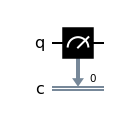

In [30]:
# defining the circuit
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q,c)

# Add a measurement to the circuit
circuit.measure(q,c)

# visualize circuit
circuit.draw(output='mpl') 

Up to this point we have only define the circuit, added some operations in the qubit (the measurement),and visualize it. Lets now compile and execute our circuit! now we need to 


In [31]:
# define the simulator
simulator = Aer.get_backend('statevector_simulator')
# execute the circuit wiht the simulator and get the output state vector
job = execute(circuit, simulator).result()
state = job.get_statevector()
print("state of qubit = " + str(state))


state of qubit = [1.+0.j 0.+0.j]


Unless specified differently, qubits are always initialize in the |0> state. Since we have done nothing to the qubit, we expect to always measure the |0> state ($\alpha$=1, $\beta$=0). 

The statevector backend is very usefull to understand what the circuit is doing, but in general due to the probabilistic nature of a quantum computer, we want to execute the circuit several times and know what the probability of a given state is after executing our circuit. For that we can use the qasm_simulator backend, which by default executes the circuit 1024 times. 

total cound for 00 are: {'0': 1024}


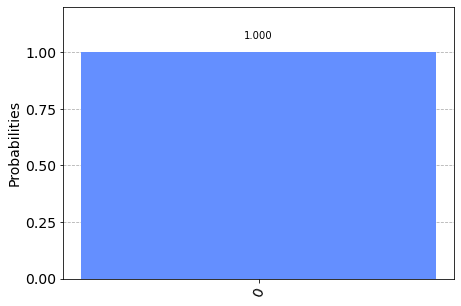

In [29]:
# define simulator
simulator = Aer.get_backend('qasm_simulator')
# execute the circuit with this simulator
job = execute(circuit, simulator).result()
counts = job.get_counts()

print ("total counts for |0> are:",counts)
# plot histogram
plot_histogram(counts)

Let now run the same circuit but the qubit initialized in the state |1>:

state of qubit = [0.+0.j 1.+0.j]


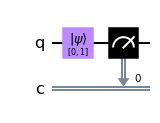

In [34]:
#define circuit
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q,c)

# Define initial_state alpha=0, beta=1
initial_state = [0,1]   
circuit.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit

# Add a measurement to the circuit
circuit.measure(q,c)

# define the simulator
simulator = Aer.get_backend('statevector_simulator')

# execute the circuit wiht the simulator and get the output state vector
job = execute(circuit, simulator).result()
state = job.get_statevector()
print("state of qubit = " + str(state))
circuit.draw(output='mpl') 


Now lets add some gates:

State of qubit after execution = [0.+0.j 1.+0.j]


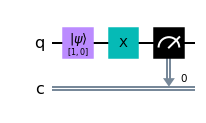

In [52]:
#define circuit
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q,c)

# Define initial_state alpha=1, beta=0 --> state |0>
initial_state = [1,0]   
circuit.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit

# An X gate flips the qubit
circuit.x(0)

# ---- Add any extra gates here----

# Add a measurement to the circuit
circuit.measure(q,c)

# define the simulator
simulator = Aer.get_backend('statevector_simulator')

# execute the circuit wiht the simulator and get the output state vector
job = execute(circuit, simulator).result()
state = job.get_statevector()

print("State of qubit after execution = " + str(state))

#visualize crcuit
circuit.draw(output='mpl') 


#### Q1: What happens if you apply a Z or a Y gate? What about two consecutive X gates?


Now lets apply an Rz rotation on our qubit:

State of qubit after execution of Rz and X = [6.123234e-17-1.j 0.000000e+00+0.j]


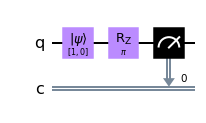

In [53]:
from math import pi

#define circuit
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q,c)

# Define initial_state alpha=1, beta=0 --> state 00
initial_state = [1,0]   
circuit.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit

# A R-phi rotation 180 degrees
circuit.rz(pi,q)

# ---- Add extra gates to execute on qubit here----

# Add a measurement to the circuit
circuit.measure(q,c)

# define the simulator
simulator = Aer.get_backend('statevector_simulator')

# execute the circuit wiht the simulator and get the output state vector
job = execute(circuit, simulator).result()
state = job.get_statevector()

print("State of qubit after execution of Rz and X = " + str(state))

#visualize crcuit
circuit.draw(output='mpl') 


#### Q2 What changed? Can you achieve the same with a different gate(s)? 

You can also try to play with some other gates:

- Rx or Ry rotations by and angle

- S-gate (sometimes known as the $\sqrt Z$, is an R-$\phi$ with $\phi=\pi/2$)

- T-gate is a very commonly used gate, is an R-$\phi$ with $\phi=\pi/4$

Circuits that have gates that depend on an parameter, eg. the angle, are called parametrized circuits. Parametrized circuits can be used for example to find the optimal solution of a problem. This is normally done by using a hybrid workflow where the optimization is done classically but the outptu is computed in a quanutm computer. The two work in tandem to find the solution to a problem. Examples of these type of algorithms are  the variational quantum eigensolver (VQE) and the quanutm approximate optimization algorithm (QAOA).


#### Q3 What happens if you apply two consecutive S gates or two consecutive T gates?

### 2.1. Hadamards <a id='hadamards'></a>

The Hadamard gate is probably the most important single-qubit gate. Lets see what it does:

State of qubit after measurement = [0.+0.j 1.+0.j]


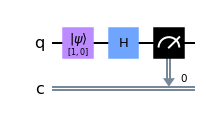

In [99]:
#define circuit
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q,c)

# Define initial_state alpha=1, beta=0 --> state |0>
initial_state = [1,0]   
circuit.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit

# A hadamard operation and measurement
circuit.h(q)

# ---- Add extra gates to execute on qubit here----

# Add a measurement to the circuit
circuit.measure(q,c)

# define the simulator
simulator = Aer.get_backend('statevector_simulator')

# execute the circuit wiht the simulator and get the output state vector
job = execute(circuit, simulator).result()
state = job.get_statevector()

print("State of qubit after measurement = " + str(state))

#visualize crcuit
circuit.draw(output='mpl') 

The Hadamard gate creates a state that is an even superposition of the basis states |0> and |1>. 
It is only when we measure the qubit that we "collapse" the state to one of these values.
Here is when using the qasm_simulator becomes very important, as then we can verify that indeed if we execute several times the circuit we will get in some cases (~50%) as output state |0> and in some cases (~50%) state |1>.


total counts for |0> are: {'0': 516, '1': 508}


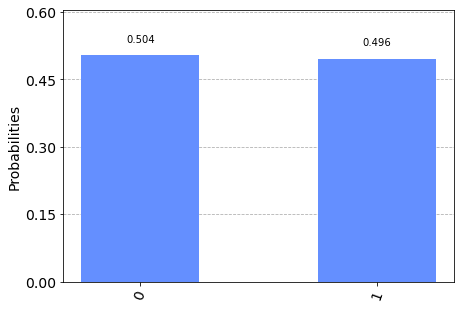

In [69]:
# define simulator
simulator = Aer.get_backend('qasm_simulator')
# execute the circuit with this simulator
job = execute(circuit, simulator).result()
counts = job.get_counts()

print ("total counts for |0> are:",counts)
# plot histogram
plot_histogram(counts)

As seen above, the probability of measuring $|0>$ or $|1>$ is now more or less evenly distributed. The 

#### Q4 Can you also set a system in a superposition state with other gates? 
#### Q5 What is the effect of applying HXH? or HZH?

Many quantum gates can be expressed as a composition of other gates, hence not all gates are needed in a quantum computer. The minimum set of gates needed to represent all operations is called a "universal gate set" or in other words, any set of gates to which any operation possible on a quantum computer can be reduced is a universal gate set. One example of a universal gate set is  {H, Rz, CNOT} (we will explore the CNOT gate in a bit).

This is similar with classical computer, where a (classical) gate set is called universal if, by stringing together enough gates from the set, you can express any Boolean function on any number of bits.

As a side note, all single gates can be written in a general unitary form $U3(\theta, \phi, \lambda)$. Before running a circuit on a real quantum hardware, all single-qubit operations are compiled down to this form. 
For this reason they are sometimes called the physical gates.

### 2. 2 Measurments <a id='measurements'></a>
So far, all of our measurments are done in the Z-basis, but there is nothing intrinsically special about it.
We can "create" our own measurments in any basis.

In the quick exercises above, we saw you could create an X-gate by sandwiching our Z-gate between two H-gates:
X=HZH. Starting in the Z-basis, the H-gate switches our qubit to the X-basis, the Z-gate peforms a NOT in the X-basis, and the final H-gate returns our qubit to the Z-basis.

Following the same logic, we can creat a measurment in the X-basis (or any other basis) by sandwiching our Z-measurement between two H-gates.

total counts for |0> are: {'0': 1024}


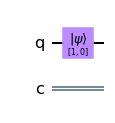

In [76]:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

def y_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the Y-basis, and store the result in 'cbit'"""
    qc.s(qubit)
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    qc.sdg(qubit)
    return qc

#define circuit
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q,c)

# Define initial_state alpha=1, beta=0 --> state |0>
initial_state = [1,0]   
circuit.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit

# ---- Add extra gates to execute on qubit here----

# Add a measurement to the circuit
# Z measurement
#circuit.measure(q, c)
# X measurment
#x_measurement(circuit, 0, 0)
# Y measurment
#y_measurement(circuit, 0, 0)

# define simulator
simulator = Aer.get_backend('qasm_simulator')
# execute the circuit with this simulator
job = execute(circuit, simulator).result()
counts = job.get_counts()

print ("total counts for |0> are:",counts)
# plot histogram
plot_histogram(counts)


#### Q6 What happens when you measure in different basis? Do you get what you expected?

Measuring in different bases allows us to also witness Heisenberg’s famous "uncertainty principle" in action. Having certainty of measuring a state in the Z-basis removes all certainty of measuring a specific state in the X-basis, and vice versa. A common misconception is that the uncertainty is due to the limits in our equipment, but here we can see the uncertainty is actually part of the nature of the qubit.

For example, if we put our qubit in the state |0>, our measurement in the Z-basis is certain to be |0>, but our measurement in the X-basis is completely random! (|+> or |->). Similarly, if we put our qubit in the state |->, our measurement in the X-basis is certain to be |-> but now any measurement in the Z-basis will be completely random.

### 2.3 Multiqubit gates <a id='multiplequbits'></a>
So far we have only used single qubit gates, but what happens when we have a circuit with more than one qubit?

total counts for |00> are: {'01': 263, '11': 254, '10': 252, '00': 255}


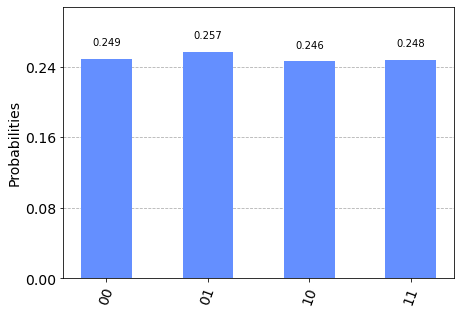

In [100]:
#define circuit
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit2 = QuantumCircuit(q,c)

# Define initial_state for both qubit to be alpha=1, beta=0 --> state |00>
#initial_state = ([1,0], [1,0])   
#circuit.initialize(initial_state, 1) # CHECK

# ---- Add extra gates to execute on qubit here----
circuit2.h(q)

circuit2.measure(q, c)

# define simulator
simulator = Aer.get_backend('qasm_simulator')
# execute the circuit with this simulator
job = execute(circuit2, simulator).result()
counts = job.get_counts()

print ("total counts for |00> are:",counts)
# plot histogram
plot_histogram(counts)



#### Q7 What happens if you apply a hadamard gate to each qubit?

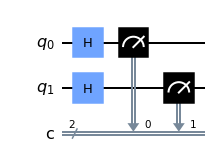

In [101]:
#To visualize how the circuit looks like uncomment the line below:
circuit2.draw(output='mpl')

The application of a Hadamard gate to each of the qubits (q0 and q1) "distributes" the probability of measuring them between |0> or |1>. This means that the total state of the system can be either |00>, |01>, |10>, |11>, all of these states are equally likely.

#### Q8 What happens if you only apply H to only one of the qubits? It is the same for both qubits?

#### 2.3.1 CNOT <a id='cnot'></a>
The CNOT (or controlled X) is a two qubit control gate and is highly use to create entangled states.
It flips the second qubit (the target qubit) if and only if the first qubit (the control qubit) is |1>. Let's see some examples:

total counts for |00> are: {'00': 1024}


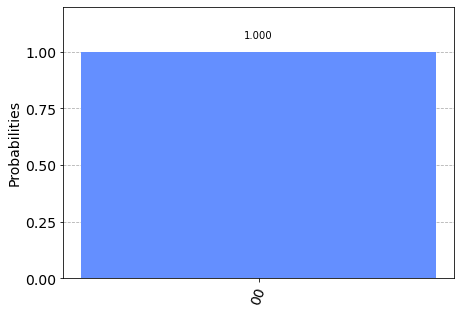

In [102]:
#define circuit
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit2 = QuantumCircuit(q,c)

# Define initial_state for both qubit to be alpha=1, beta=0 --> state |00>
#initial_state = ([1,0], [1,0])   
#circuit.initialize(initial_state, 1) # CHECK

# ---- Add extra gates to execute on qubit here----

circuit2.cnot(0,1)

circuit2.measure(q, c)

# define simulator
simulator = Aer.get_backend('qasm_simulator')
# execute the circuit with this simulator
job = execute(circuit2, simulator).result()
counts = job.get_counts()

print ("total counts for |00> are:",counts)
# plot histogram
plot_histogram(counts)

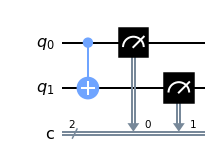

In [104]:
# visualize circuit
circuit2.draw(output='mpl')

In the circuit above, both q0 and q1 are initialized in state |0>, the initial quantum state of the system is |00>. Then, the CNOT gate is applied using q0 as the control qubit and q1 as the target qubit. Since the control qubit is |0>, the CNOT has no effect on the target qubit. The state of the system does not change. When measured, we observe state |00> with probability 1.0.

#### Q9: What happens if we apply initialize q0 in state |1> ? (or apply a X gate to q0 before the CNOT?)
#### Q10: What happens if we apply a Hadamard to the control qubit (q0) before the CNOT?


The Hadamard gate sets q0 in state |0> with ~0.5 probability and in state |1> with ~0.5 probability.
For the 0.5 probability where q0 is |0>, applying a CNOT does nothing on q1. In this case the quantum state of the system is |00>.
For the 0.5 probability where q0 is |1>, applying a CNOT flips q1 to state |1>. In this case the quantum state of the system is |11>. Therefore, there is an equal probability of meassuring |00> and |11>.

The quantum state created by the above circuit can be written as 

$|\psi> = 1/ \sqrt(2)|00> + 1\sqrt(2)|11>$ 

and is one of the so called "Bell states" (https://en.wikipedia.org/wiki/Bell_state). The Bell states are maximally entangled, that means that measuring one already "defines" the value of the other. If we measure q0 at state |0>, we know q1 is also in state |0>, if we measure q0 in |1> we know q1 is also in state |1>. They are somehow linked and this "link" is called entanglement.

More formally (for the curious) an entangle state is a state of the system that can not be described by the individual qubits, only by the whole multi-qubit register (https://en.wikipedia.org/wiki/Quantum_entanglement). 

#### Q11: There are three other Bell states of 2-qubits:

$|\psi> = 1/ \sqrt(2)|00> - 1\sqrt(2)|11>$ 

$|\psi> = 1/ \sqrt(2)|01> + 1\sqrt(2)|10>$ 

$|\psi> = 1/ \sqrt(2)|01> - 1\sqrt(2)|10>$ 

#### Can you create them?

The same method can also be used to entangle n qubits. Lets try for example 4:

total counts for |00> are: {'0000': 506, '1111': 518}


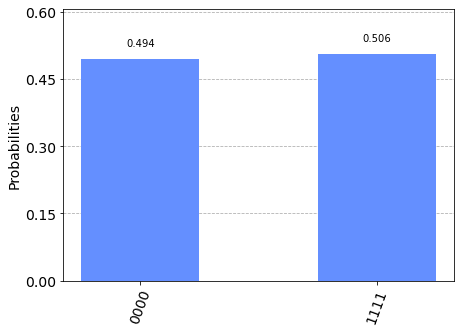

In [120]:
#define circuit
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
circuit4 = QuantumCircuit(q,c)

circuit4.h(0)

# using q_0 always as contol qubit
for i in range(1,n):
    circuit4.cnot(0,i)
    
# ---- Add extra gates to execute on qubit here----

circuit4.measure(q, c)

# define simulator
simulator = Aer.get_backend('qasm_simulator')
# execute the circuit with this simulator
job = execute(circuit4, simulator).result()
counts = job.get_counts()

print ("total counts for |00> are:",counts)
# plot histogram
plot_histogram(counts)


Again, if we only measure qubit q0, we already know the state of the other n-qubits. The CNOT gate is also known as CX gate. There are also CZ and CY gates.

#### 2.3.2 SWAP gate <a id='swap'></a>

Sometimes we need to move information around in a quantum computer. For some qubit implementations, this could be done by physically moving them. Another option is simply to move the state between two qubits. This is done using the SWAP gate.



total counts are: {'0010': 1024}


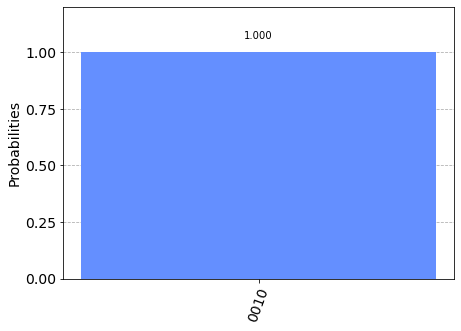

In [127]:
#define circuit
q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')
circuit4 = QuantumCircuit(q,c)


# Using an x gate to define initial state of qubit q0 to be alpha=0, beta=1 --> state |10>
circuit4.x(0)

circuit4.swap(0,1) 

# ---- Add extra gates to execute on qubit here----

circuit4.measure(q, c)

# define simulator
simulator = Aer.get_backend('qasm_simulator')
# execute the circuit with this simulator
job = execute(circuit4, simulator).result()
counts = job.get_counts()

print ("total counts are:",counts)
# plot histogram
plot_histogram(counts)

The swap gate change the state of qubit q0 and q1. Initially q0 was in state |1> and q1 in state |0>. The total state of the system was |1000>. The swap gate change the state of q0 --> q1 which was |0> and the state of q1 --> q0 whcih was |1>. The total state of the system is now |0100>

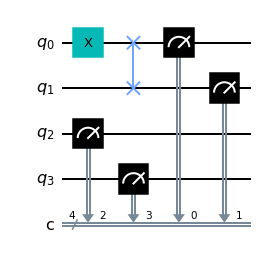

In [128]:
# visualize circuit
circuit4.draw(output='mpl')

# Quantum algorithms

A quantum algorithm is nothing else than a quanutm circuit to solve a particular problem. 
Many quantum algorithms are based around the analysis of some function f(x). Often these algorithms simply assume the existence of some 'black box' implementation of this function, which we can give an input x and receive the corresponding output f(x). This is referred to as an oracle.
The advantage of thinking of the oracle in this abstract way allows us to concentrate on the quantum techniques we use to analyze the function, rather than the function itself. [10]

# Grover's algorithm

Grover's algorithm, also known as the quantum search algorithm, refers to a quantum algorithm for unstructured search that finds with high probability the unique input to a black box function that produces a particular output value [9]

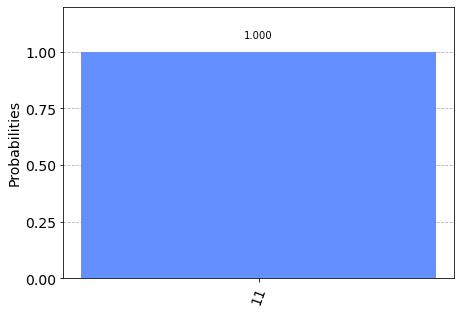

In [132]:
#Grover's algorithm to find state 11

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

# Find a value for which a function is true, state for which f will flip phase
q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')
grover_circuit = QuantumCircuit(q,c)

# initialize circuit in a superposition off all states using hadamard gates
grover_circuit = initialize_s(grover_circuit, [0,1])

# apply oracle
# because system is in superposition, the oracle is applied to all states at the same time (quantum parallelism)
# but it will only flip the phase of the state we are searching
grover_circuit.cz(0,1) 

# If we measure here, still all states are equally likely, since we have only flipped the phase!

# Diffusion operator (U_s)
grover_circuit.h([0,1]) # hadamard to both qubits
grover_circuit.z([0,1]) # flip phase 00
grover_circuit.cz(0,1)
grover_circuit.h([0,1]) # hadamard to both again

grover_circuit.measure(q,c)

counts = execute(grover_circuit, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

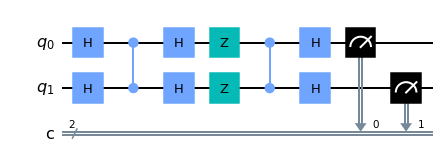

In [133]:
grover_circuit.draw(output='mpl')

In this example, the oracle was quite simple (just a controlled-z), but in general the oracle needs to be constructed. There are recepies to do this depending on your problem.
After the "flip" oracle has been applied we need to make use of the constructive and destructive interference of states to "increase" the probability of the state we are looking for. This is called the Diffusion operator

## References <a id='references'></a>

1. Aaronson, S., & Gottesman, D. (2004). Improved simulation of stabilizer circuits.Physical ReviewA,70(5), 1–15. https://doi.org/10.1103/physreva.70.052328

2. Abraham,  H.,  Akhalwaya,  I.  Y.,  Aleksandrowicz,  G.,  Alexander,  T.,  Alexandrowics,  G.,  Arbel,E.,  Asfaw,  A.,  Azaustre,  C.,  AzizNgoueya,  Barkoutsos,  P.,  Barron,  G.,  Bello,  L.,  Ben-Haim,  Y.,  Bevenius,  D.,  Bishop,  L.  S.,  Bosch,  S.,  Bravyi,  S.,  Bucher,  D.,  Cabrera,  F.,. . .  yotamvakninibm. (2019). Qiskit: An open-source framework for quantum computing.https://doi.org/10.5281/zenodo.2562110

3. Asfaw, A., Bello, L., Ben-Haim, Y., Bravyi, S., Capelluto, L., Vazquez, A. C., Ceroni, J., Chen, R.,Frisch, A., Gambetta, J., Garion, S., Gil, L., Gonzalez, S. D. L. P., Harkins, F., Imamichi,T., McKay, D., Mezzacapo, A., Minev, Z., Movassagh, R., . . .  Wootton, J. (2020). Learnquantum computation using qiskit. http://community.qiskit.org/textbook

4. Emerson, J. (2004). Pseudo-random unitary operators for quantum information processing.Sci-ence,302(5653). https://doi.org/10.1126/science.1090790

5. Fingerhuth,  M.,  Babej,  T.,  &  Wittek,  P.  (2018).  Open  source  software  in  quantum  computing.PLOS ONE,13(12), 1–28. https://doi.org/10.1371/journal.pone.0208561

6. Jones, T., Brown, A., Bush, I., & Benjamin, S. (2018). Quest and high performance simulation ofquantum computers. https://arxiv.org/pdf/1802.08032.pdf

7. Qulacs. (2018). https://github.com/qulacs/qulacs

8. https://qiskit.org/documentation/intro_tutorial1.html

9. https://en.wikipedia.org/wiki/Grover%27s_algorithm

10.https://qiskit.org/textbook/ch-gates/oracles.html